<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2025/blob/main/2_Patch_seq_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patch-seq Data

## Setup

Loading our Google Drive files:

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Metadata

Let's load in the metadata file, which has information about each neuron that was analyzed in Gouwens et al, 2020.

We can use `index_col` to set the cell_specimen_id column to be the index of the dataframe

In [3]:
cell_metadata = pd.read_csv("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/20200711_patchseq_metadata_mouse.csv", index_col="cell_specimen_id")

In [4]:
cell_metadata.head()

,project,cell_specimen_name,hemisphere,structure,donor_id,donor_name,biological_sex,age,ethnicity,medical_conditions,...,apical_dendrite_status,neuron_reconstruction_type,cell_soma_normalized_depth,depth_from_pia_um,ephys_session_id,transcriptomics_sample_id,transcriptomics_batch,T-type Accession ID,T-type Label,MET-type Label
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
601506507,mIVSCC-MET,Vip-IRES-Cre;Ai14-331294.04.01.01,left,VISpm4,331294,Vip-IRES-Cre;Ai14-331294,M,P55,NaN,NaN,...,NaN,full,0.361015,NaN,601506492,PS0810_E1-50_S88,BT035,CS180626100018,Vip Gpc3 Slc18a3,Vip-MET-2
601790961,mIVSCC-MET,Sst-IRES-Cre;Ai14-331663.04.01.01,left,VISpm5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.621829,NaN,601790945,PS0817_E1-50_S19,BT036,CS180626100041,Sst Tac2 Myh4,NaN
601803754,mIVSCC-MET,Sst-IRES-Cre;Ai14-331663.04.02.02,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.164240,NaN,601803733,PS0817_E1-50_S25,BT036,CS180626100035,Sst Calb2 Pdlim5,Sst-MET-3
601808698,mIVSCC-MET,Sst-IRES-Cre;Ai14-331663.04.02.03,right,VISp5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.483030,NaN,601808619,PS0817_E1-50_S26,BT036,CS180626100043,Sst Hpse Cbln4,Sst-MET-8
601810307,mIVSCC-MET,Sst-IRES-Cre;Ai14-331663.04.02.04,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.295656,NaN,601810292,PS0817_E1-50_S27,BT036,CS180626100034,Sst Calb2 Necab1,Sst-MET-3


### Examining a cell

Let's look at one cell to see what information the dataset contains about each cell:

In [5]:
cell_metadata.loc[601810307]

,601810307
project,mIVSCC-MET
cell_specimen_name,Sst-IRES-Cre;Ai14-331663.04.02.04
hemisphere,right
structure,VISp2/3
donor_id,331663
donor_name,Sst-IRES-Cre;Ai14-331663
biological_sex,F
age,P57
ethnicity,NaN
medical_conditions,NaN


This is a unified format for both mice and humans, but our cells are all mice: certain features (ethnicity, medical conditions) therefore aren't recorded

### How many cells are there total?

In [6]:
cell_metadata.shape

(4435, 22)

There are 4,435 cells.

### How many total mice are represented in the dataset?

In [7]:
cell_metadata['donor_id'].nunique()

1040

There 1,040 unique donor mice in the dataset -- only an average of 4 cells per mouse

Text(0.5, 0, 'Number of cells donated')

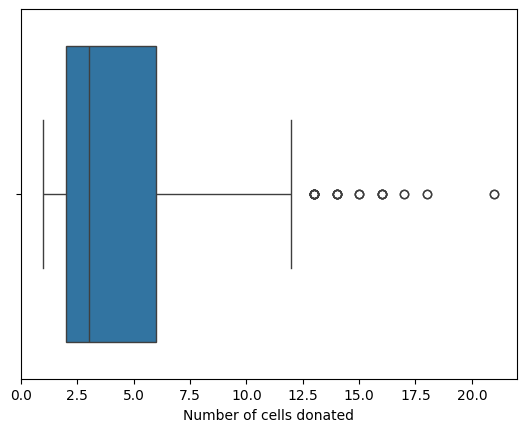

In [8]:
sns.boxplot(x=cell_metadata['donor_id'].value_counts())
plt.xlabel('Number of cells donated')

### Which brain structures are represented in the dataset?

In [9]:
cell_metadata['structure'].value_counts()

,count
structure,
VISp2/3,1148
VISp5,1120
VISp6a,729
VISp4,388
VISp1,239
VISpm5,139
VISpm2/3,117
VISl5,78
VISpm6a,66


There are a lot of different structures- seems like this field indicates a lot of info:
* VIS - visual cortex
* p/a/m - posterior/anterior/medial
* Number - layer?

## Categorical splits

In [10]:
cell_metadata['hemisphere'].value_counts()

,count
hemisphere,
right,2352
left,2083


In [11]:
cell_metadata['biological_sex'].value_counts()

,count
biological_sex,
M,2417
F,2018


Roughly even split between hemispheres, biological sexes

## Genetic Data

Our transcriptomic data is saved in an hdf file because it is so large (4,000 cells $\times$ 40,000 genes $\approx$ 160 million counts!)

In [12]:
rna_data = pd.read_hdf("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/gene_counts_ppm.hdf5.lz4")

Each column represents a gene- some are unidentified, but most have meaningful names that reflect their function
 * Should we ignore some of these?

In [13]:
rna_data.columns

Index(['0610005C13Rik', '0610006L08Rik', '0610007P14Rik', '0610009B22Rik',
       '0610009E02Rik', '0610009L18Rik', '0610009O20Rik', '0610010B08Rik',
       '0610010F05Rik', '0610010K14Rik',
       ...
       'n-R5s134', 'n-R5s136', 'n-R5s138', 'n-R5s139', 'n-R5s141', 'n-R5s142',
       'n-R5s143', 'n-R5s144', 'n-R5s146', 'n-R5s149'],
      dtype='object', name='sample_id', length=45768)

A random sampling of gene names:

In [14]:
import numpy as np
np.random.choice(rna_data.columns, 20)

array(['Gm9540', 'Gm11476', 'Nrbf2', 'Gm34887', 'Olfr825', 'Mir6351',
       'LOC105246250', 'Kalrn', 'Lrrn4cl', 'Gm31808', 'Myl7', 'Krtap19-4',
       'C230004F18Rik', 'Gm31278', 'Mup20', 'Tax1bp1', 'Tfg', 'Gm18055',
       'Gm10327', 'Gm34130'], dtype=object)

Each row represents a cell, with the columns representing the relative amount of gene expression in ppm

For example, if we just have genes A, B, and C, and there are 10 copies of A, 90 copies of B, 0 copies of C in the cell, that would result in:

* A - 100,000
* B - 900,000
* C - 0

5% of RNA is Gene X --> Gene X is 50,000 cpm

Normalized per cell -- we're looking at the

## Looking at a cell

Let's look at the top 10 genes expressed in a cell:

In [15]:
# sort the values in the cell in descending order
rna_data.loc[992825872].sort_values(ascending = False).head(10)

,992825872
sample_id,
Malat1,8896.351940
Rn18s-rs5,8712.864681
Nrxn3,8099.387078
Adarb2,6696.358241
Lars2,6483.216476
Calm1,5706.639088
Arpp21,4700.239275
Zc3h7a,4207.233105
Snap25,4025.599253


Malat1 has 8896 cpm expression $\rightarrow$ accounts for 0.89% of cell's measured transcriptome

## How many genes are there represented in the dataset?

In [16]:
rna_data.shape

(4435, 45768)

There are ~4.4k cells, ~45k genes represented in the dataset

## Are there any cells with no recorded gene expression, or genes that aren't recorded in the cells' transcriptomes?

Let's make sure that each cell's gene expression sums up to 1 million (which we would expect since we're working with counts per million) - double check that there aren't cells without counts

In [21]:
# Sum each row (cell) of the dataset - we would expect this to be 1 million
total_expression_per_cell = rna_data.sum(axis=1)
total_expression_per_cell.describe()

,0
count,4.435000e+03
mean,1.000000e+06
std,1.995815e-08
min,1.000000e+06
25%,1.000000e+06
50%,1.000000e+06
75%,1.000000e+06
max,1.000000e+06


We can see that our min and max are both $10^6$ = 1,000,000

### Are there genes that aren't recorded at all?

Are there any NaN values in the dataset at all?

In [25]:
rna_data.isna().sum().sum()

np.int64(0)

There are 0 NA values.

Are there any columns (genes) in the dataset with all 0 values?

In [30]:
zero_count_genes = rna_data.sum(axis=0) == 0
print(zero_count_genes.sum())

3838


There are 3838 genes with zero expression across cells- we can get rid of them:

In [39]:
zero_gene_names = rna_data.columns[zero_count_genes]
zero_gene_names

Index(['1110025L11Rik', '1110057P08Rik', '1700003I22Rik', '1700018B24Rik',
       '1700020D14Rik', '1700023G09Rik', '1700034B16Rik', '1700042O10Rik',
       '1700047L14Rik', '1700049E17Rik1',
       ...
       'n-R5s133', 'n-R5s134', 'n-R5s138', 'n-R5s139', 'n-R5s141', 'n-R5s142',
       'n-R5s143', 'n-R5s144', 'n-R5s146', 'n-R5s149'],
      dtype='object', name='sample_id', length=3838)

In [41]:
rna_data = rna_data.drop(zero_gene_names, axis=1)

In [42]:
rna_data.shape

(4435, 41930)

Gets whether each count is zero (False) or nonzero (True):

In [43]:
rna_data != 0

sample_id,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,n-R5s136
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
601506507,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
601790961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
601803754,False,False,False,True,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
601808698,False,False,True,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,True,True,False
601810307,False,False,True,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992825872,False,False,False,True,False,True,False,False,True,True,...,True,True,False,True,True,True,True,False,True,False
1003305641,False,False,True,False,False,True,True,False,True,False,...,True,True,False,True,False,True,True,False,True,False
1003313398,False,False,True,False,True,False,False,False,True,True,...,False,False,False,True,True,True,True,False,True,False


Create a dataframe with the number of cells where each gene occurs:

In [50]:
# Sum up the numnber of nonzero counts for each gene
gene_frequencies = (rna_data != 0).sum().sort_values(ascending=False)
gene_frequencies.head(20)

,0
sample_id,
Snap25,4435
Malat1,4435
LOC105246107,4435
Rnr2,4435
Camk1d,4435
Jarid2,4435
Rn18s-rs5,4435
Calm1,4435
Lars2,4435


We can see that there are several genes (ex: Snap25, Malat1, etc)

* Snap25 - pre-synaptic membrane protein that regulates neurotransmitter release, needed to communicate
* Malat1 - non-coding, downregulation associated with disease(??), cancers (less Malat1 -> more disease). Plays role in synapse density (how would we measure that?)
* LOC105246107 - ??? Probably something that's uknown, arbitrary(?) label assigned- let's try to look at the dataset documentation
* Rnr2 - RNA component of ribosome (45S) - makes sense that it would be present
* Camk1d - Codes for proteins that rely on calcium, cal-modulin; supports breast cancer, supresses diabetes
* Jarid2 - Transcription regulator - represses transcription; seen in embryonic development, highly expressed in bone marrow and intestines

<Axes: xlabel='None'>

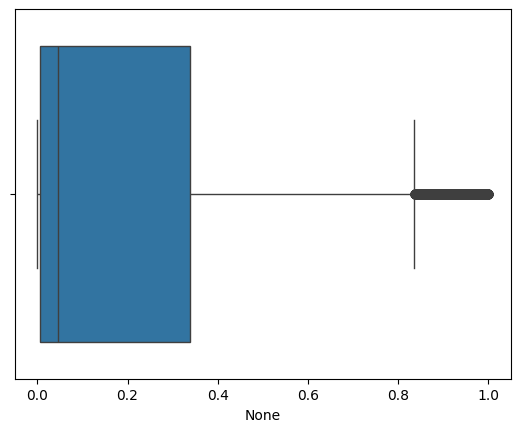

In [52]:
sns.boxplot(x=gene_frequencies / rna_data.shape[0])

<Axes: xlabel='None', ylabel='Count'>

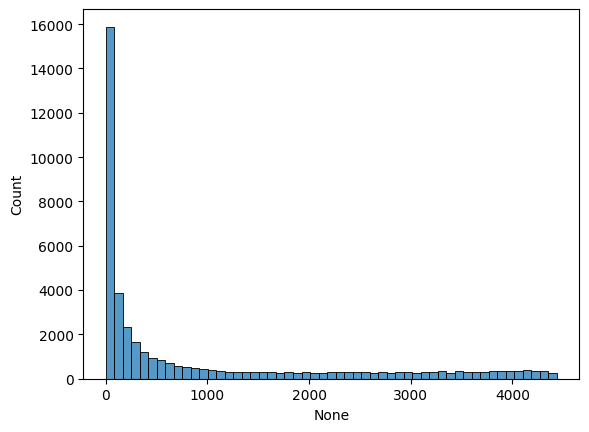

In [54]:
sns.histplot(x=gene_frequencies)

Genes that are expressed in all / almost all cells are outliers

### Is the abundance of Snap25 similar across cells?

In [67]:
# Get a dataframe with all the gene counts we're interested in
gene_counts = rna_data[['Snap25', 'Rnr2']]

In [68]:
gene_counts.describe()

sample_id,Snap25,Rnr2
count,4435.000000,4435.000000
mean,1571.982650,5237.057207
std,970.930225,6886.385126
min,1.253335,135.353653
25%,957.676767,1561.375499
50%,1361.095932,3040.956366
75%,1916.486170,6225.142591
max,11177.505321,94166.156139


<Axes: >

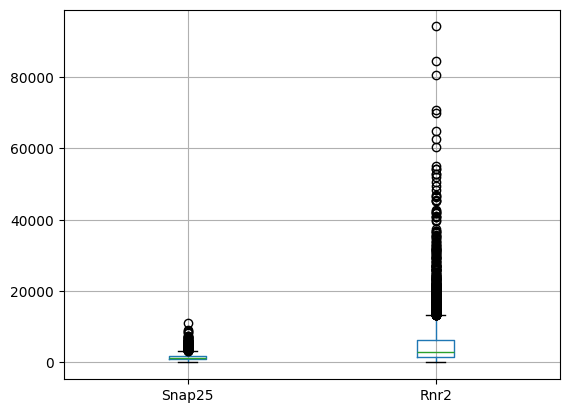

In [69]:
gene_counts.boxplot()

Rnr2 tends to have much higher counts overall.